# Information about the corpus

* Tokens (POS, BIO gloss)
* Typos (POS, BIO, gloss)
* Total Words
* Average words lenght

In [18]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import special
from utils import get_corpus, WordsToLetter, extractFeatures
from pprint import pprint
from functools import reduce
import collections

original_corpus = get_corpus('corpus_otomi_mod', '../corpora/')
hard_corpus = get_corpus('corpus_otomi_hard', '../corpora/')
corpora = original_corpus + hard_corpus

In [2]:
# Conteo de palabras

def obtener_palabras(corpora):
    palabras = []
    for frases in corpora:
        for frase in frases:
            chunks = [palabra[0] for palabra in frase[:-1]]
            palabras.append("".join(chunks))
    return palabras

In [3]:
# Funciones auxiliares

def count_occurrence(bag, _type):
    if _type in bag.keys():
        bag[_type] += 1
    else:
        bag[_type] = 1
    return bag

def dict_sorter(data):
    # Ref https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
    return {k: v for k, v in sorted(data.items(), key=lambda item: item[1], reverse=True)}

In [4]:
# Funciones que obtienen tokens
def get_tokens(corpus):
    gloss_tags, pos_tags = dict(), dict()
    for frases in corpus:
        for frase in frases:
            for parte in frase[:-1]:    
                gloss_tags = count_occurrence(gloss_tags, parte[1])
            pos_tags = count_occurrence(pos_tags, frase[-1])
    return dict_sorter(pos_tags), dict_sorter(gloss_tags)


def get_bio_tokens(corpus):
    bio_tokens = dict()
    frases = WordsToLetter(corpus)
    for frase in frases:
        for letras in frase:
            for letra in letras:
                bio_tokens = count_occurrence(bio_tokens, letra[-1])  # Only Bio Label
    return dict_sorter(bio_tokens)

In [16]:
# Obteniedo datos del corpus
pos, gloss = get_tokens(corpora)
bio = get_bio_tokens(corpora)
palabras = obtener_palabras(corpora)

pos_types = pos.keys()
gloss_types = gloss.keys()
bio_types = bio.keys()
words_types = set(palabras)

longitudes_palabras = list(map(lambda x: len(x), palabras))
longitud_promedio = sum(longitudes_palabras) / len(longitudes_palabras)

# Frecuencias ordenadas
frecuencias = {}
for longitud in longitudes_palabras:
    frecuencias = count_occurrence(frecuencias, longitud) 
frecuencias = dict_sorter(frecuencias)

## Información del corpus

In [13]:
# Reportando tamaño del corpus
print("Frases etiquetadas corpus original:", len(original_corpus))
print("Frases etiquetadas corpus retador:", len(hard_corpus))
print("Frases etiquetadas totales:", len(corpora))
print("Longitud promedio de palabra:", round(longitud_promedio, 4))

Frases etiquetadas corpus original: 1688
Frases etiquetadas corpus retador: 81
Frases etiquetadas totales: 1769
Longitud promedio de palabra: 4.8932


### Tipos y tokens

In [8]:
print("Número de tokens Palabras: ", len(palabras))
print("Numero de tipos Palabras: ", len(words_types), "\n")

print("Numero de tokens POS:", reduce(lambda x, y: x + y, pos.values()))
print("Numero de tipos POS:", len(pos_types), "\n")

print("Numero de tokens GLOSA:", reduce(lambda x, y: x + y, gloss.values()))
print("Numero de tipos GLOSA:", len(gloss_types))

Número de tokens Palabras:  8550
Numero de tipos Palabras:  3125 

Numero de tokens POS: 8550
Numero de tipos POS: 44 

Numero de tokens GLOSA: 14405
Numero de tipos GLOSA: 112


## Gráficas

In [26]:
def graph_config(conf):
    plt.rcParams['figure.figsize'] = [conf['width'], conf['height']]
    fig, ax = plt.subplots()
    ax.grid(alpha=0.5, color=conf['colors'][0])
    ax.locator_params(axis='y', nbins=10)
    ax.locator_params(axis='x', nbins=10)
    ax.set_xlabel(conf["xlabel"], fontsize=conf["fontsize"])
    ax.set_ylabel(conf["ylabel"], fontsize=conf["fontsize"])
    ax.set_title(conf["title"], fontsize=conf["fontsize"])
    plt.tick_params(axis='both', direction='out', length=5, width=5,
                    labelcolor=conf['colors'][0], colors=conf['colors'][1])
    if conf['save']:
        plt.savefig(conf['path'], dpi=300, bbox_inches='tight')
    return plt
    

def graph_maker(data, conf):
    plt.rcParams['figure.figsize'] = [conf['width'], conf['height']]
    plt.grid()
    plt.xticks(rotation=90)
    plt.yscale('log', base=2)
    plt.xlabel(conf["xlabel"], fontsize=conf["fontsize"])
    plt.ylabel(conf["ylabel"], fontsize=conf["fontsize"])
    plt.title(conf["title"], fontsize=conf["fontsize"])
    plt.tick_params(axis='both', direction='out', length=5, width=5, labelcolor=conf['labelcolor'],
                    colors=conf['tickscolor'], grid_color=conf['gridcolor'], grid_alpha=0.5)
    if conf["limit"] >= 1:
        plt.plot(list(data.keys())[:conf['limit']], list(data.values())[:conf['limit']], color=conf['color'], linestyle='-.', linewidth=3)
    else:
        plt.plot(list(data.keys()), list(data.values()), color=conf['color'], linestyle='-.', linewidth=3)
    #plt.savefig(conf['path'], dpi=300, bbox_inches='tight')
    plt.show()

### Ranking de palabras por longitud 

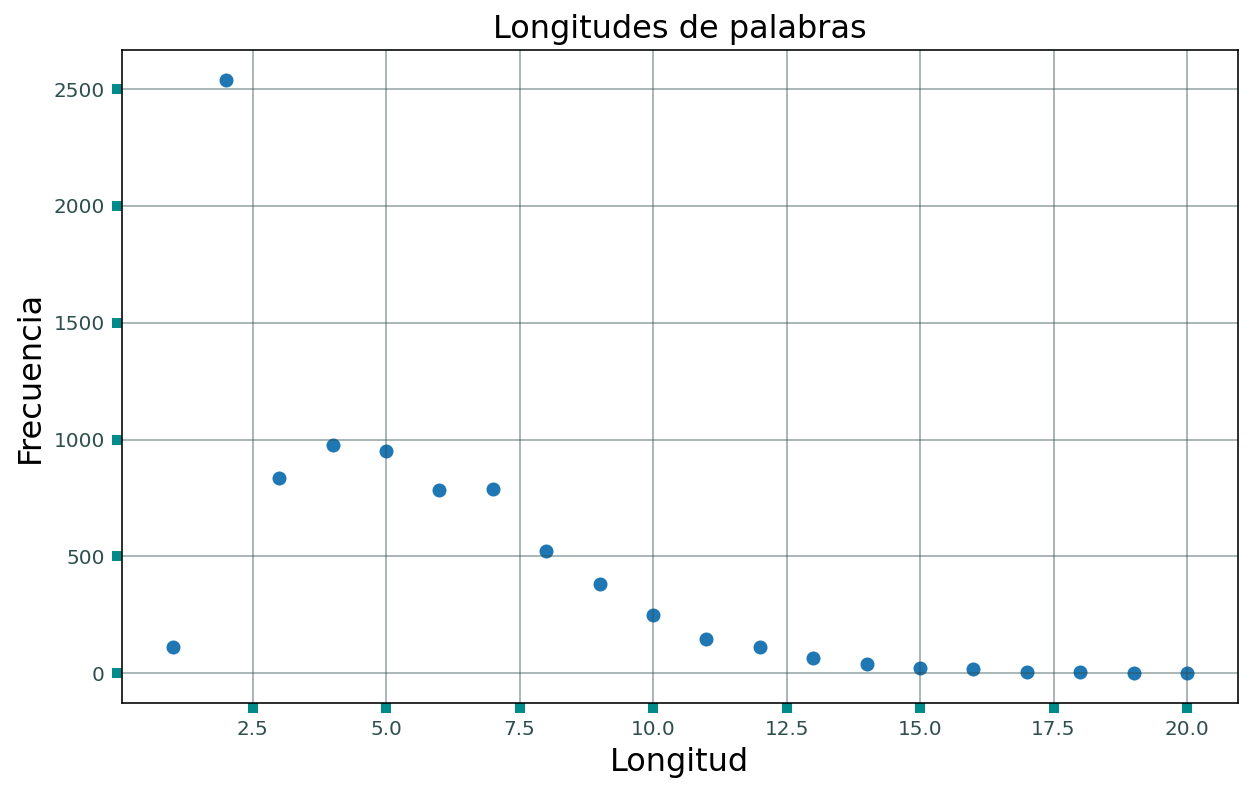

In [27]:
config = {"title": "Longitudes de palabras", "width": 10, "height": 6, "fontsize": 16,
          "xlabel": "Longitud", "ylabel": "Frecuencia",
          "colors": ['darkslategray', 'darkcyan', 'deepskyblue'], "save": False}
plt = graph_config(config)
plt.scatter(list(frecuencias.keys()), list(frecuencias.values()))

<AxesSubplot:>

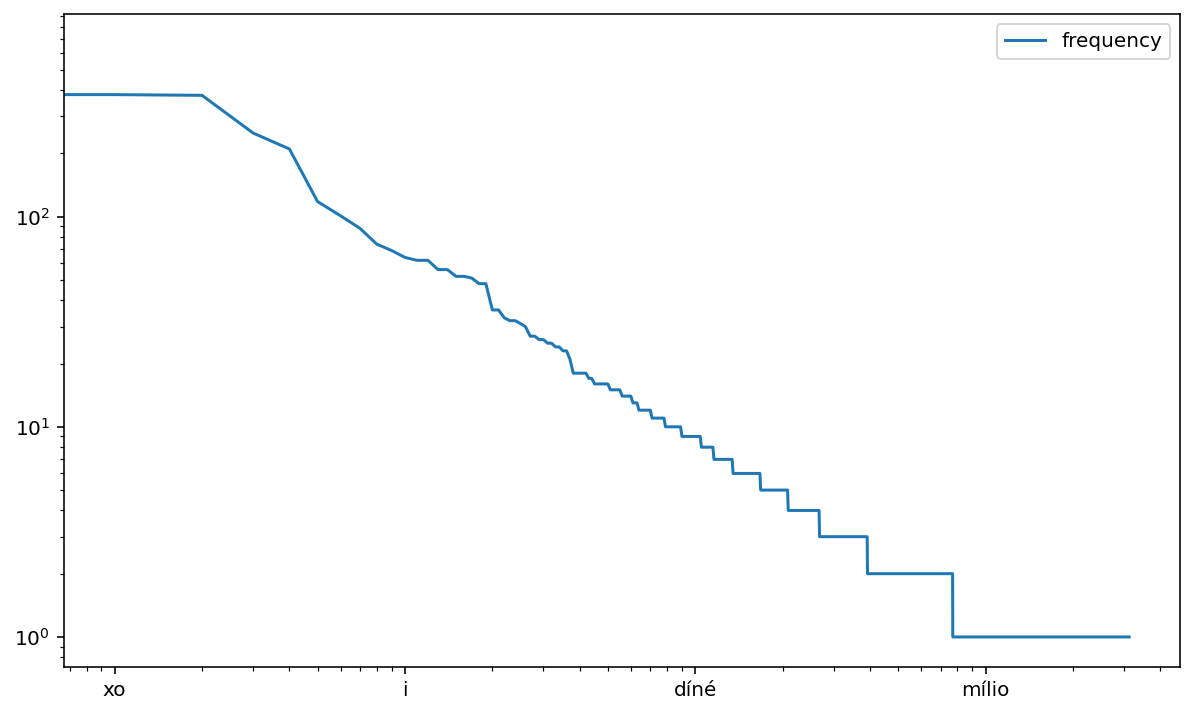

In [28]:
# Making word bag
words_frequencies = collections.Counter(palabras)
# Ordening by frequence
words_frequencies = dict_sorter(words_frequencies)
pd_words = pd.DataFrame(data=list(words_frequencies.values()), index=list(words_frequencies.keys()), columns=["frequency"])
pd_words.plot(loglog=True)
# Making freq values to np array
#s = list(words_frequencies.values())
#s = np.array(s)
#zipf_graph(s, conf)

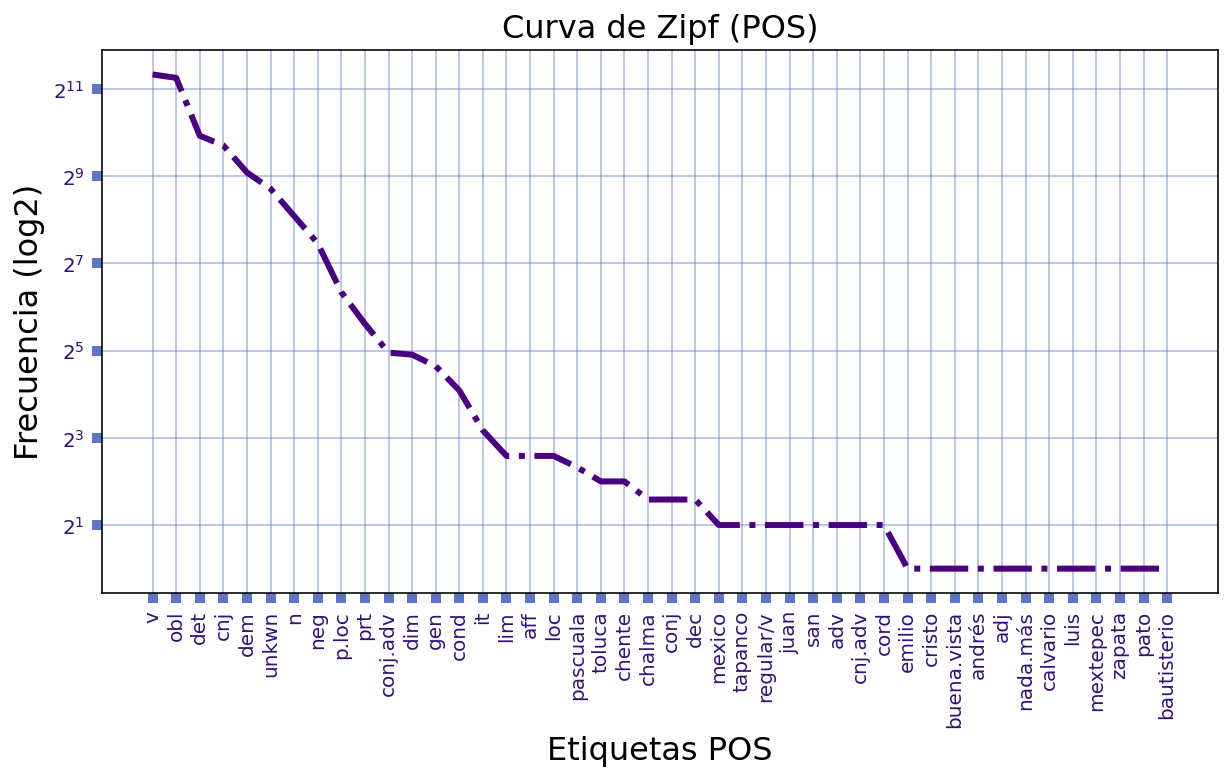

In [29]:
# Distribución de las etiquetas POS
conf = {"width": 10, "height": 5, "fontsize": 16, "xlabel": "Etiquetas POS", "ylabel": "Frecuencia (log2)",
        "title": "Curva de Zipf (POS)", "labelcolor": '#32127a', "tickscolor": '#5d76cb', "gridcolor": "#5d76cb", "color": "Indigo",
        "path": "latex/img/zipf_pos.png", "limit": -1}

graph_maker(pos, conf)

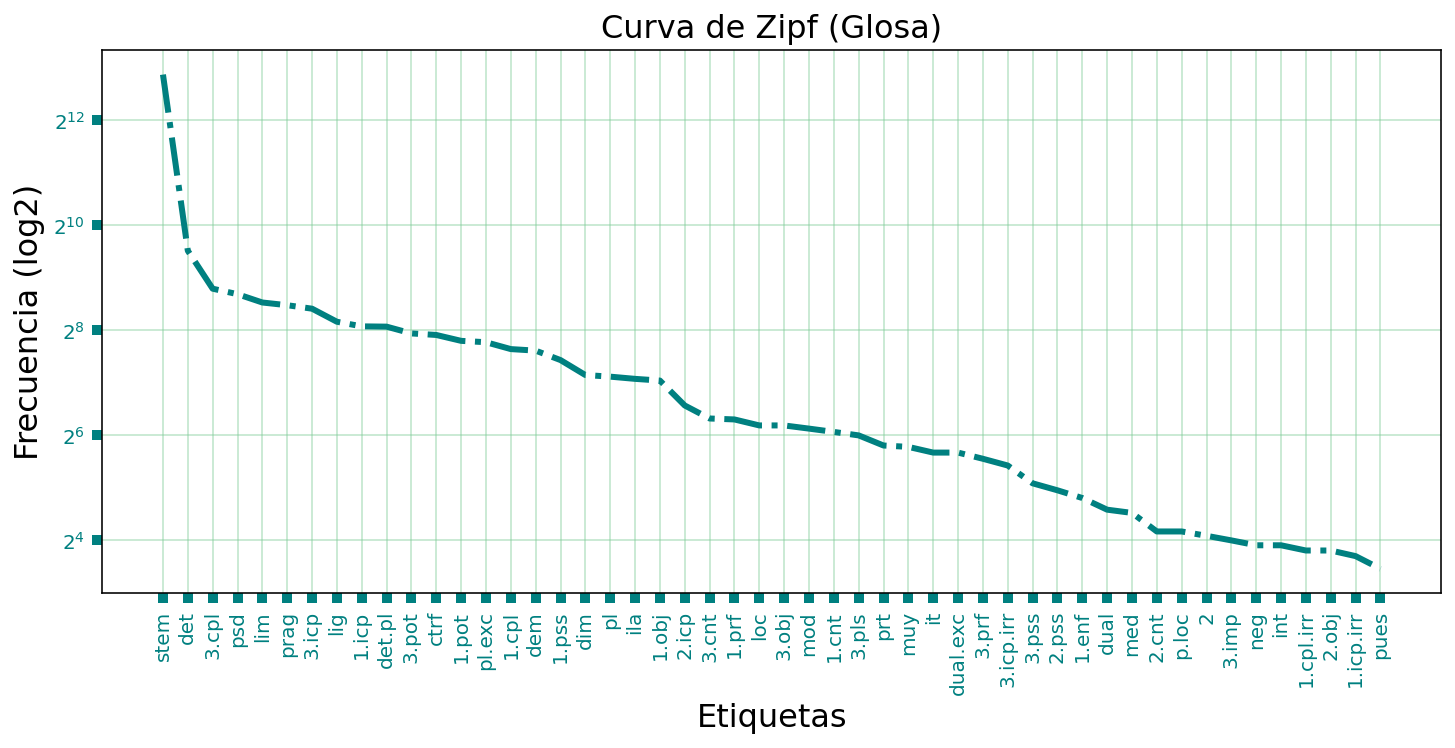

In [30]:
# Distribución de la glosa
conf = {"width": 12, "height": 5, "fontsize": 16, "xlabel": "Etiquetas", "ylabel": "Frecuencia (log2)",
        "title": "Curva de Zipf (Glosa)", "labelcolor": '#008080', "tickscolor": 'teal', "gridcolor": "#7fcc99", "color": "teal",
        "path": "latex/img/zipf_gloss.png", "limit": 50}

graph_maker(gloss, conf)

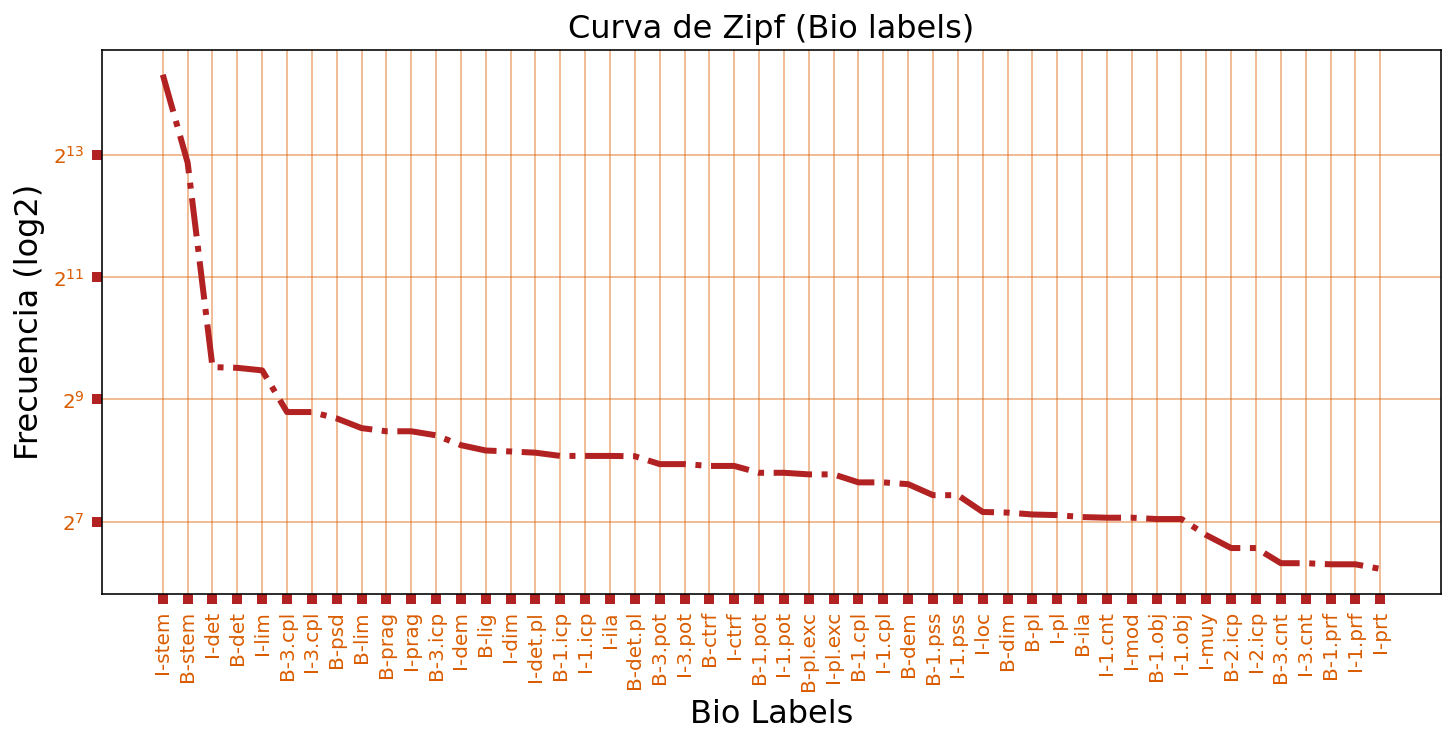

In [31]:
# Distribución de las Bio Labels
conf = {"width": 12, "height": 5, "fontsize": 16, "xlabel": "Bio Labels", "ylabel": "Frecuencia (log2)",
        "title": "Curva de Zipf (Bio labels)", "labelcolor": '#da5c00', "tickscolor": 'firebrick', "gridcolor": "#da5c00", "color": "firebrick",
        "path": "latex/img/zipf_bio.png", "limit": 50}

graph_maker(bio, conf)

In [32]:
def types_to_table(data, columns):
    return "".join([t + " \\\\\n " if i % columns == 0 else t + " & " for i, t in enumerate(data, start=1)])

def tokens_to_table(data, limit=0):
    table = ""
    if limit:
        counts = list(data.items())[:limit]
    else:
        counts = data.items()
    for key, count in counts:
        table += f"{key} & {count} \\\\\n"
    return table

In [33]:
# Cuenta de Bio Labels a cuerpo de tabla latex 
print(tokens_to_table(bio, limit=10))

I-stem & 20346 \\
B-stem & 7501 \\
I-det & 739 \\
B-det & 733 \\
I-lim & 712 \\
B-3.cpl & 444 \\
I-3.cpl & 444 \\
B-psd & 413 \\
B-lim & 370 \\
B-prag & 357 \\



In [34]:
# Cuenta de etiquetas POS a cuerpo de tabla latex 
print(tokens_to_table(pos, limit=10))

v & 2579 \\
obl & 2443 \\
det & 973 \\
cnj & 835 \\
dem & 543 \\
unkwn & 419 \\
n & 272 \\
neg & 176 \\
p.loc & 81 \\
prt & 49 \\



In [35]:
# Cuenta de etiquetas de glosa a cuerpo de tabla latex 
print(tokens_to_table(gloss, limit=10))

stem & 7501 \\
det & 733 \\
3.cpl & 444 \\
psd & 413 \\
lim & 370 \\
prag & 357 \\
3.icp & 341 \\
lig & 287 \\
1.icp & 270 \\
det.pl & 269 \\



In [36]:
# Tipos de etiquetas POS a cuerpo de tabla Latex 
print(types_to_table(pos_types, 4))

v & obl & det & cnj \\
 dem & unkwn & n & neg \\
 p.loc & prt & conj.adv & dim \\
 gen & cond & it & lim \\
 aff & loc & pascuala & toluca \\
 chente & chalma & conj & dec \\
 mexico & tapanco & regular/v & juan \\
 san & adv & cnj.adv & cord \\
 emilio & cristo & buena.vista & andrés \\
 adj & nada.más & calvario & luis \\
 mextepec & zapata & pato & bautisterio \\
 


In [37]:
# Tipos de etiquetas de glosa a cuerpo de tabla Latex 
print(types_to_table(gloss_types, 5))

stem & det & 3.cpl & psd & lim \\
 prag & 3.icp & lig & 1.icp & det.pl \\
 3.pot & ctrf & 1.pot & pl.exc & 1.cpl \\
 dem & 1.pss & dim & pl & ila \\
 1.obj & 2.icp & 3.cnt & 1.prf & loc \\
 3.obj & mod & 1.cnt & 3.pls & prt \\
 muy & it & dual.exc & 3.prf & 3.icp.irr \\
 3.pss & 2.pss & 1.enf & dual & med \\
 2.cnt & p.loc & 2 & 3.imp & neg \\
 int & 1.cpl.irr & 2.obj & 1.icp.irr & pues \\
 1.pls & aum & que & y & 2.cpl \\
 toluca & 2.prf & aqui & gen & com \\
 hasta & 2.pot & como & 3.cpl.irr & mientras \\
 cuando & adj & agujerear/v & por.que & 1.sg \\
 encl & solo & cond & 1.irr & mucho \\
 conj.adv & spt & 2.enf & 3.pss.pl & uno \\
 pueblo & mexico & animal.de.dios & 3.sg & coraje \\
 dist & pascuala & prf & donde & chente \\
 nom & dios & loco & tal.vez & tiempo \\
 mujer/v & 2.icp.irr & con & eh & lugar/v \\
 maria & vez & comp & chico & det.dem \\
 para & rapido & caus & dcl & mov \\
 si & 3.irr & 


In [38]:
# Tipos de etiquetas BIO a cuerpo de tabla Latex 
print(types_to_table(bio_types, 1700))

I-stem & B-stem & I-det & B-det & I-lim & B-3.cpl & I-3.cpl & B-psd & B-lim & B-prag & I-prag & B-3.icp & I-dem & B-lig & I-dim & I-det.pl & B-1.icp & I-1.icp & I-ila & B-det.pl & B-3.pot & I-3.pot & B-ctrf & I-ctrf & B-1.pot & I-1.pot & B-pl.exc & I-pl.exc & B-1.cpl & I-1.cpl & B-dem & B-1.pss & I-1.pss & I-loc & B-dim & B-pl & I-pl & B-ila & I-1.cnt & I-mod & B-1.obj & I-1.obj & I-muy & B-2.icp & I-2.icp & B-3.cnt & I-3.cnt & B-1.prf & I-1.prf & I-prt & I-3.obj & B-loc & B-3.obj & B-mod & B-1.cnt & B-3.pls & I-3.pls & B-prt & B-muy & B-it & I-it & B-dual.exc & I-dual.exc & I-toluca & B-3.prf & I-3.prf & B-3.icp.irr & I-3.icp.irr & I-2.cnt & B-3.pss & I-3.pss & B-2.pss & I-2.pss & I-3.imp & I-neg & B-1.enf & I-1.enf & I-1.icp.irr & B-dual & I-dual & I-2.obj & B-med & I-aum & B-2.cnt & B-p.loc & I-p.loc & I-int & B-2 & I-2 & B-3.imp & B-neg & B-int & B-1.cpl.irr & I-1.cpl.irr & I-3.icp & B-2.obj & I-gen & B-1.icp.irr & I-aqui & B-pues & I-pues & B-1.pls & I-1.pls & B-aum & B-que & I-qu